In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Numerical solution to the duhamel integral

In [17]:
m = 1000 # mass [kg] 
xi = 0.05 #Damping ratio
f = 1.5 # Natural frquency
wn = 2*math.pi*f # Angular natural frequency
wd = wn*math.sqrt(1-xi**2)# Damped natural frequency

In [19]:
t_max = 20
delT = 0.01
time = np.arange(0,t_max + delT, delT)
f_Force = 1
wf= 2* math.pi*f_Force
P = 1000
force = P*np.sin(wf*time)

In [25]:
def Duhamel(T,F):
    # Create a vector of zeros to add the displacement values into
    U = np.zeros(len(T))
    
    A_cum_i = 0
    B_cum_i = 0
    
    #Iterate through the time vector to evaluate the response at each time point
    
    for i, t in enumerate(T):
        if i > 0:
            # calculate A(i)
            y_i = math.e**(xi*wn*T[i]) * F[i] * math.cos(wd*T[i]) # Value of integrand at current time-step
            y_im1 = math.e**(xi*wn*T[i-1]) * F[i-1] * math.cos(wd*T[i-1]) # Value of integrand at previous time-step
            Area_i = 0.5*delT*(y_i + y_im1) # Area of current trapezoid
            A_cum_i += Area_i # Cumulative area from t=0 to current time
            A_i = (1/(m*wd))*A_cum_i # Value of A for the current time-step

            #Calculate B(i)
            y_i = math.e**(xi*wn*T[i]) * F[i] * math.cos(wd*T[i]) # Value of integrand at current time-step
            y_im1 = math.e**(xi*wn*T[i-1]) * F[i-1] * math.cos(wd*T[i-1]) # Value of integrand at previous time-step
            Area_i = 0.5*delT*(y_i + y_im1) # Area of current trapezoid
            B_cum_i += Area_i # Cumulative area from t=0 to current time
            B_i = (1/(m*wd))*B_cum_i # Value of B for the current time-step

            #Calculate the repsonse 
            U[i] = A_i * math.e**(-xi*wn*T[i]) * math.sin(wd*T[i]) - B_i*math.e**(-xi*wn*T[i]) * math.cos(wd*T[i])
    
    return U


In [31]:
response = Duhamel(time,force)

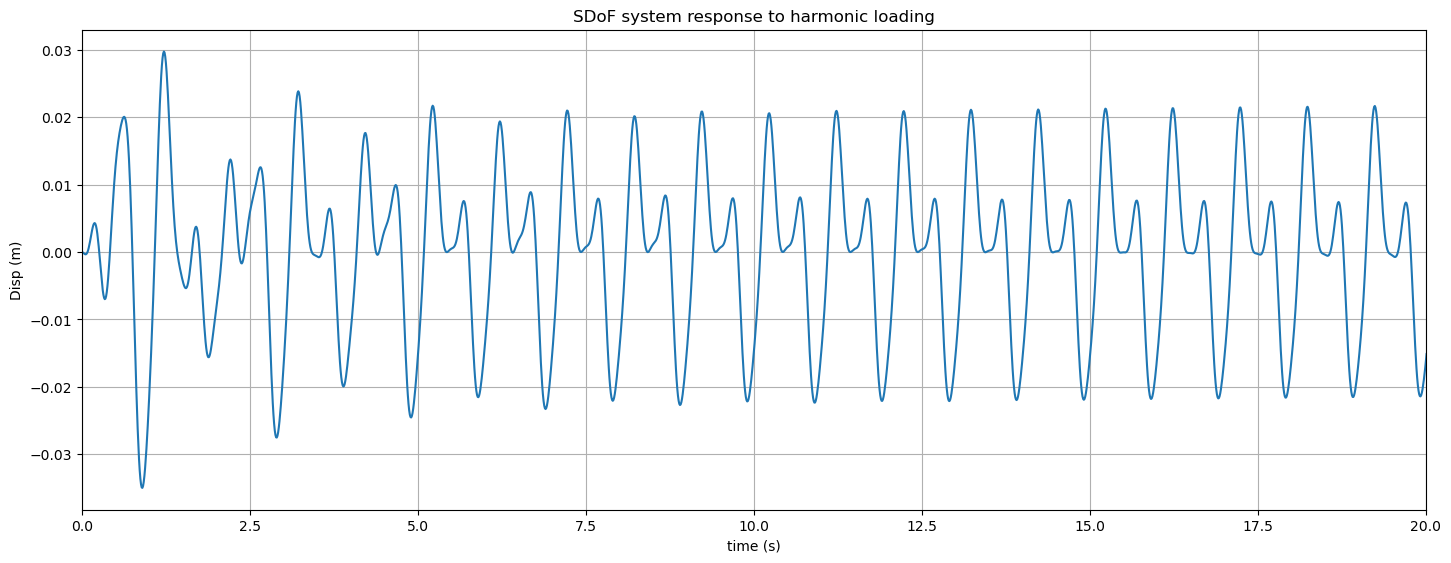

In [36]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,2.1,1.0])
axes.plot(time,response)

axes.set_xlabel('time (s)')
axes.set_ylabel('Disp (m)')
axes.set_title('SDoF system response to harmonic loading')
axes.set_xlim([0,t_max])
plt.grid()
plt.show()

# 3.2 Validating our numerical solution

In [47]:
beta = wf/wd 
k = m * wd**2

O = (P/k)*(1/((1-beta**2)**2 + (2*xi*beta)**2))
response_cf = O * ((1-beta**2)*np.sin(wf*time) - 2*xi*beta*np.cos(wf*time))


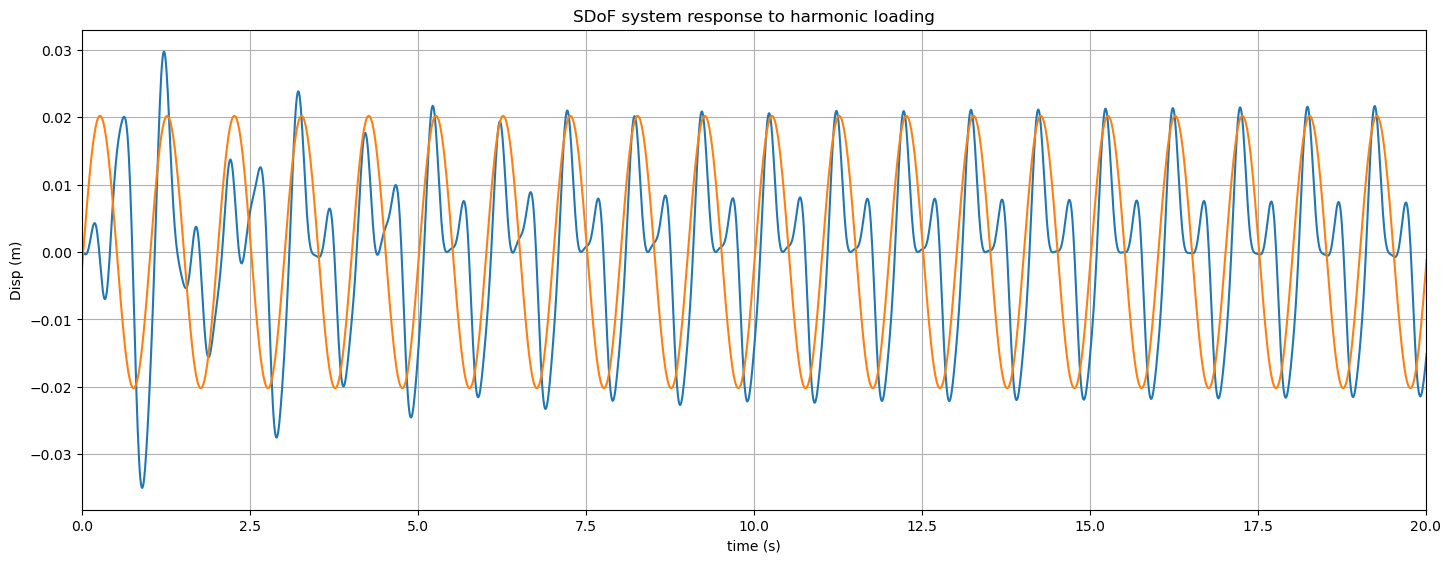

In [52]:
fig = plt.figure()

axes = fig.add_axes([0.1,0.1,2.1,1.0])
axes.plot(time,response,label='Duhamel')
axes.plot(time,response_cf, label='closed-form')


axes.set_xlabel('time (s)')
axes.set_ylabel('Disp (m)')
axes.set_title('SDoF system response to harmonic loading')
axes.set_xlim([0,t_max])
plt.grid()
plt.show()